<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/tabular_playground_series_2021_aug_tabular_playground_series_aug_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone --recursive https://github.com/Microsoft/LightGBM

Cloning into 'LightGBM'...
remote: Enumerating objects: 23326, done.
remote: Counting objects: 100% (1003/1003), done.
remote: Compressing objects: 100% (549/549), done.
remote: Total 23326 (delta 619), reused 743 (delta 434), pack-reused 22323
Receiving objects: 100% (23326/23326), 18.10 MiB | 21.30 MiB/s, done.
Resolving deltas: 100% (17012/17012), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'external_libs/compute'
Submodule 'eigen' (https://gitlab.com/libeigen/eigen.git) registered for path 'external_libs/eigen'
Submodule 'external_libs/fast_double_parser' (https://github.com/lemire/fast_double_parser.git) registered for path 'external_libs/fast_double_parser'
Submodule 'external_libs/fmt' (https://github.com/fmtlib/fmt.git) registered for path 'external_libs/fmt'
Cloning into '/content/LightGBM/external_libs/compute'...
remote: Enumerating objects: 21731, done.        
remote: Counting objects: 100% (3/3), done.        
remote: 

In [2]:
%cd /content/LightGBM

/content/LightGBM


In [3]:

!mkdir build
!cmake -DUSE_GPU=1
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd /content/LightGBM/python-package/
!sudo python setup.py install --precompile

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Looking for CL_VERSION_2_2
-- Looking for CL_VERSION_2_2 - found
-- Found OpenCL: /usr/lib/x86_64-linux-gnu/libOpenCL.so (found version "2.2") 
-- OpenCL include directory: /usr/include
-- Boost version: 1.65.1
-- Found the following Boost libraries:
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/tabular-playground-series/2021-aug/tabular-playground-series-aug-2021_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/tabular-playground-series/2021-aug/tabular-playground-series-aug-2021_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/tabular-playground-series/2021-aug/tabular-playground-series-aug-2021_sample_submission.csv')
train.shape, test.shape, submit.shape

((250000, 102), (150000, 101), (150000, 2))

In [ ]:
train['loss'].skew()  # target 라벨에 log1p씌울까 

1.4653191365369271

Text(0.5, 1.0, 'Train set Skew')

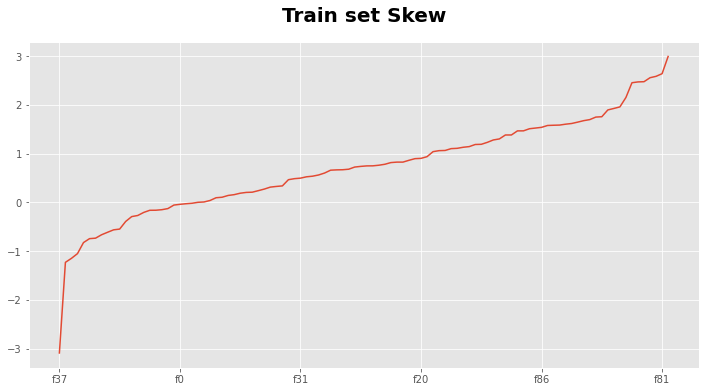

In [ ]:
plt.figure(figsize=(12,6))
train.skew().sort_values().plot()
plt.title('Train set Skew', fontsize=20, fontweight='bold', pad=20)
# noramlize를 적용 할까 고민

# cluster DBSCAN기법

- DBSCAN(density-based spatial clustering of application with noise)은 클러스터의 갯수를 미리 지정하지 않는 군집 알고리즘


- DBSCAN은 병합 군집이나 k-평균보다는 다소 느리지만 비교적 큰 데이터셋에도 적용



- 데이터의 밀집지역이 한 클러스터를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터와 구분함



- DBSCAN은 특성 공간에서 가까이 있는 데이터가 많아 붐비는 지역의 포인트를 찾음

- 이런 지역을 밀집 지역dense region이라 함

- 밀집 지역에 있는 포인트를 핵심 포인트core point라고함



- 핵심 포인트: min_samples, epsepsilon

  - 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 갯수만큼 들어 있으면 이 데이터 포인트를 핵심 포인트로 분류

  - eps(거리)보다 가까운 핵심 샘플은 동일한 클러스터로 분류

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = pd.concat([train.drop(columns=['id']), test.drop(columns=['id'])], axis=0)
data_columns = data.columns

for i in data.columns:
  if i == 'loss':
    continue
  data[i] = MinMaxScaler().fit_transform(data[[i]])

In [ ]:
from sklearn.cluster import DBSCAN

data['cluster'] = DBSCAN(n_jobs=-1).fit_predict(data.drop(columns=['loss']))
data

KeyboardInterrupt: ignored

# Clustering 적용하자

In [6]:
!pip install catboost
!pip install optuna

     |████████████████████████████████| 67.4 MB 81 kB/s 
     |████████████████████████████████| 302 kB 8.6 MB/s 
     |████████████████████████████████| 164 kB 53.9 MB/s 
     |████████████████████████████████| 80 kB 8.8 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 111 kB 49.7 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 141 kB 49.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=19291b9419c0a219883d44fdbad45c8a503ebb469e788a35f626784a6294aaa5
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [3]:
import catboost
import optuna
import optuna.integration.lightgbm as lgbo
import lightgbm
import xgboost
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneGroupOut, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
# 데이터 나누기
x_train = train.drop(columns=['id', 'loss'])
y_train = train['loss']
x_test = test.drop(columns=['id'])
x_train_columns = x_train.columns
x_test_columns = x_test.columns
x_train.shape, y_train.shape, x_test.shape

((250000, 100), (250000,), (150000, 100))

In [5]:
mm = MinMaxScaler().fit(x_train)
x_train = mm.transform(x_train)
x_test = mm.transform(x_test)

x_train = pd.DataFrame(x_train, columns=x_train_columns)
x_test = pd.DataFrame(x_test, columns=x_test_columns)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'elbow method')

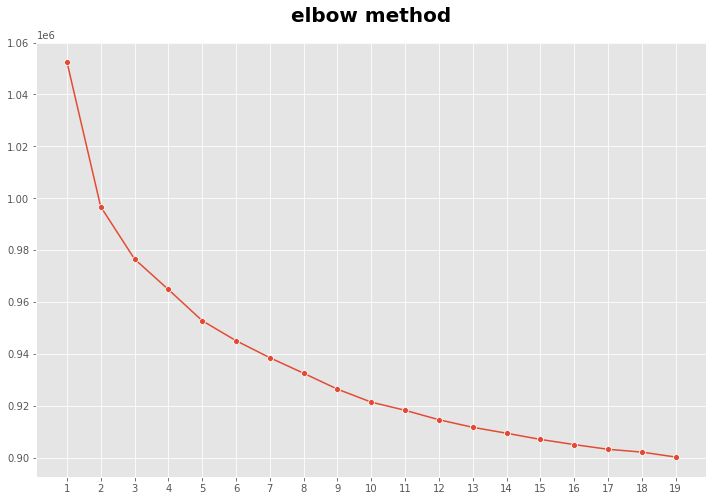

In [ ]:
# Clustering
from sklearn.cluster import KMeans

vstack = np.vstack((x_train,
                    x_test))

sse = {}
for i in range(1,20, 1):
  km = KMeans(n_clusters=i, max_iter=1000, random_state=0, n_jobs=-1).fit(vstack)
  sse[i] = km.inertia_

plt.figure(figsize=(12,8))
sns.lineplot(pd.Series(sse).index, pd.Series(sse), marker='o')
plt.xticks(pd.Series(sse).index)
plt.title('elbow method', fontsize=20, fontweight='bold', pad=20)

In [ ]:
km = KMeans(n_splits=, max_iter=1000, n_jobs=-1).fit(vstack)

x_train['cluster'] = km.predict(x_train)
x_test['cluster'] = km.predict(x_test)

In [ ]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))

for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(iterations=3000, learning_rate=0.022, loss_function='RMSE', eval_metric='RMSE', task_type='GPU')
  model_cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid), verbose=100, early_stopping_rounds=70)

  preds += np.expm1(model_cat.predict(x_test)) / kf.n_splits

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1.1039045	test: 1.1063753	best: 1.1063753 (0)	total: 10.3ms	remaining: 30.9s
100:	learn: 1.0945647	test: 1.0977858	best: 1.0977858 (100)	total: 1.8s	remaining: 51.6s
200:	learn: 1.0901819	test: 1.0942911	best: 1.0942911 (200)	total: 2.91s	remaining: 40.6s
300:	learn: 1.0869794	test: 1.0920953	best: 1.0920953 (300)	total: 4.21s	remaining: 37.7s
400:	learn: 1.0843921	test: 1.0905177	best: 1.0905177 (400)	total: 5.58s	remaining: 36.2s
500:	learn: 1.0821666	test: 1.0893155	best: 1.0893155 (500)	total: 7.41s	remaining: 37s
600:	learn: 1.0800835	test: 1.0882926	best: 1.0882926 (600)	total: 9.82s	remaining: 39.2s
700:	learn: 1.0781490	test: 1.0874149	best: 1.0874149 (700)	total: 12.1s	remaining: 39.7s
800:	learn: 1.0763697	test: 1.0866818	best: 1.0866818 (800)	total: 14.4s	remaining: 39.6s
900:	learn: 1.0746677	test: 1.0860741	best: 1.0860741 (900)	total: 16.9s	remaining: 39.3s
1000:	learn: 1.0730308	test: 1.0855342	best: 1.0855342 (1000)	total: 18.9s	remaining: 37.8s
1100:	learn: 1

# LGBM LB: 7.90478

In [6]:
params = {'objective':'poisson', 'metric': 'rmse', 'device':'gpu'} #'objective': 'mean_squared_error',
from sklearn.metrics import mean_absolute_error
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
lgb_train = lightgbm.Dataset(X_train, Y_train)
lgb_valid = lightgbm.Dataset(X_test, Y_test)
model = lgbo.train(params, lgb_train, valid_sets=[lgb_valid], verbose_eval=False, num_boost_round=100, early_stopping_rounds=5) 
model.params

[I 2021-08-30 07:09:19,813] A new study created in memory with name: no-name-d8e4cf57-8121-4e60-986d-565df11c5f89
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021824 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction, val_score: 7.878535:  14%|#4        | 1/7 [00:07<00:46,  7.79s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022657 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction, val_score: 7.878535:  29%|##8       | 2/7 [00:15<00:38,  7.70s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022921 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction, val_score: 7.878535:  43%|####2     | 3/7 [00:23<00:31,  7.78s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.027307 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction, val_score: 7.878535:  57%|#####7    | 4/7 [00:30<00:22,  7.66s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022743 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction, val_score: 7.878535:  71%|#######1  | 5/7 [00:38<00:15,  7.64s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022742 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction, val_score: 7.878535:  86%|########5 | 6/7 [00:45<00:07,  7.53s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024170 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.878535:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023230 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:   5%|5         | 1/20 [00:10<03:13, 10.21s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023926 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  10%|#         | 2/20 [00:18<02:47,  9.28s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024329 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  15%|#5        | 3/20 [00:30<02:57, 10.44s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024425 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  20%|##        | 4/20 [00:45<03:16, 12.26s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024377 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  25%|##5       | 5/20 [01:02<03:29, 13.94s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023753 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  30%|###       | 6/20 [01:16<03:16, 14.05s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022462 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  35%|###5      | 7/20 [01:29<02:57, 13.63s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023340 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874890:  40%|####      | 8/20 [01:35<02:14, 11.19s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.025250 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.874494:  45%|####5     | 9/20 [01:48<02:08, 11.73s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022750 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  50%|#####     | 10/20 [01:59<01:54, 11.44s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023556 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  55%|#####5    | 11/20 [02:17<02:02, 13.62s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024124 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  60%|######    | 12/20 [02:28<01:42, 12.76s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023106 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  65%|######5   | 13/20 [02:39<01:24, 12.05s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023986 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  70%|#######   | 14/20 [02:49<01:09, 11.57s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021226 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  75%|#######5  | 15/20 [02:57<00:52, 10.52s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023486 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  80%|########  | 16/20 [03:12<00:46, 11.69s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.028651 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  85%|########5 | 17/20 [03:23<00:35, 11.69s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022981 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  90%|######### | 18/20 [03:33<00:21, 10.99s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023408 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


num_leaves, val_score: 7.872877:  95%|#########5| 19/20 [03:40<00:09,  9.97s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023846 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023866 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  10%|#         | 1/10 [00:11<01:40, 11.17s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022546 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  20%|##        | 2/10 [00:22<01:27, 10.99s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023865 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  30%|###       | 3/10 [00:33<01:16, 10.99s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023853 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  40%|####      | 4/10 [00:43<01:05, 10.97s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.029370 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  50%|#####     | 5/10 [00:54<00:54, 10.92s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023742 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  60%|######    | 6/10 [01:05<00:43, 10.94s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021467 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  70%|#######   | 7/10 [01:16<00:32, 10.76s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022372 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  80%|########  | 8/10 [01:27<00:21, 10.79s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023666 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


bagging, val_score: 7.872877:  90%|######### | 9/10 [01:38<00:10, 10.86s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024121 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction_stage2, val_score: 7.872877:   0%|          | 0/3 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021988 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction_stage2, val_score: 7.872877:  33%|###3      | 1/3 [00:10<00:21, 10.61s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024410 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


feature_fraction_stage2, val_score: 7.872877:  67%|######6   | 2/3 [00:21<00:10, 10.79s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021977 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872877:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022728 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872874:   5%|5         | 1/20 [00:11<03:46, 11.91s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022739 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872874:  10%|#         | 2/20 [00:24<03:36, 12.02s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022228 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  15%|#5        | 3/20 [00:35<03:23, 12.00s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023287 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  20%|##        | 4/20 [00:48<03:12, 12.04s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023883 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  25%|##5       | 5/20 [01:00<03:02, 12.14s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022459 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  30%|###       | 6/20 [01:12<02:49, 12.08s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024124 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  35%|###5      | 7/20 [01:24<02:37, 12.11s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023576 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  40%|####      | 8/20 [01:36<02:24, 12.08s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.028046 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  45%|####5     | 9/20 [01:48<02:13, 12.11s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023655 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  50%|#####     | 10/20 [02:00<02:01, 12.11s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.033865 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  55%|#####5    | 11/20 [02:12<01:48, 12.08s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023423 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  60%|######    | 12/20 [02:24<01:36, 12.07s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023628 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  65%|######5   | 13/20 [02:37<01:24, 12.10s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023267 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  70%|#######   | 14/20 [02:49<01:12, 12.10s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024451 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.872859:  75%|#######5  | 15/20 [03:01<01:00, 12.08s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024373 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.871942:  80%|########  | 16/20 [03:13<00:48, 12.13s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022744 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.871942:  85%|########5 | 17/20 [03:25<00:36, 12.12s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022447 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.871942:  90%|######### | 18/20 [03:38<00:24, 12.23s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023333 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


regularization_factors, val_score: 7.871710:  95%|#########5| 19/20 [03:50<00:12, 12.18s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022002 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


min_data_in_leaf, val_score: 7.871710:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.023811 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


min_data_in_leaf, val_score: 7.871710:  20%|##        | 1/5 [00:12<00:49, 12.32s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.024265 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


min_data_in_leaf, val_score: 7.870852:  40%|####      | 2/5 [00:24<00:36, 12.09s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021457 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


min_data_in_leaf, val_score: 7.870852:  60%|######    | 3/5 [00:36<00:24, 12.04s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.022486 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


min_data_in_leaf, val_score: 7.870852:  80%|########  | 4/5 [00:48<00:12, 12.07s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 175000, number of used features: 100
[LightGBM] [Info] Using GPU Device: Tesla P100-PCIE-16GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 100 dense feature groups (16.69 MB) transferred to GPU in 0.021921 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 1.920970


min_data_in_leaf, val_score: 7.870852: 100%|##########| 5/5 [01:00<00:00, 12.07s/it]


{'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'device': 'gpu',
 'early_stopping_round': 5,
 'feature_fraction': 1.0,
 'feature_pre_filter': False,
 'lambda_l1': 0.06439204656539935,
 'lambda_l2': 0.00018079588095795137,
 'metric': 'rmse',
 'min_child_samples': 100,
 'num_iterations': 100,
 'num_leaves': 84,
 'objective': 'poisson'}

In [17]:
del best_lgb_params['early_stopping_round']

In [7]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))
best_lgb_params = model.params
best_lgb_params["learning_rate"] = 0.006
best_lgb_params["num_iterations"] = 10000

for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_lgb = lightgbm.LGBMRegressor(**best_lgb_params)
  model_lgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=70)

  preds += model_lgb.predict(x_test) / kf.n_splits
  val_preds = model_lgb.predict(X_valid)
  RMSE = np.sqrt(mean_squared_error(val_preds, Y_valid))
  print(f'{i+1}번째 RMSE:{RMSE}')

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0.00018079588095795137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018079588095795137
[LightGBM] [Warning] lambda_l1 is set=0.06439204656539935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06439204656539935
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
Training until validation scores don't improve for 5 rounds
[100]	training's rmse: 7.91777	valid_1's rmse: 7.90504
[200]	training's rmse: 7.89409	valid_1's rmse: 7.89531
[300]	training's rmse: 7.8717	valid_1's rmse: 7.88732
[400]	training's rmse: 7.85089	valid_1's rmse: 7.88064
[500]	training's rmse: 7.83098	valid_1's rmse: 7.87468
[600]	training's rmse: 7.81161	valid_1's

# XGBoost LB: 

In [8]:
def objective(trial,data=x_train,target=y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
    params = {
        'max_depth': trial.suggest_int('max_depth', 4, 12), # Extremely prone to overfitting!
        'n_estimators': trial.suggest_int('n_estimators', 400, 4000, 400), # Extremely prone to overfitting!
        'eta': trial.suggest_float('eta', 0.007, 0.013), # Most important parameter.
        'subsample': trial.suggest_discrete_uniform('subsample', 0.2, 0.9, 0.1),
        'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.2, 0.9, 0.1),
        'colsample_bylevel': trial.suggest_discrete_uniform('colsample_bylevel', 0.2, 0.9, 0.1),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-4, 1e4), # I've had trouble with LB score until tuning this.
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1e4), # L2 regularization
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1e4), # L1 regularization
        'gamma': trial.suggest_loguniform('gamma', 1e-4, 1e4),
        'tree_method' : 'gpu_hist',
        'booster' : 'gbtree',
        'loss_function':'rmse',
        'eval_metric':'rmse'
     }

    model = xgboost.XGBRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)


    RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return RMSE

In [9]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-30 07:40:04,566] A new study created in memory with name: no-name-7be1021d-a6fb-45d8-a26e-06d762e797a8


[07:40:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:08,499] Trial 0 finished with value: 7.837774140819902 and parameters: {'max_depth': 5, 'n_estimators': 1200, 'eta': 0.010112365412387515, 'subsample': 0.5, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.8, 'min_child_weight': 0.05489829497396655, 'reg_lambda': 8.289436004178185, 'reg_alpha': 0.004197360343344479, 'gamma': 838.6877942321752}. Best is trial 0 with value: 7.837774140819902.


[07:40:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:19,421] Trial 1 finished with value: 7.8254563700209925 and parameters: {'max_depth': 9, 'n_estimators': 2000, 'eta': 0.007455517722596376, 'subsample': 0.8, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.8, 'min_child_weight': 14.50947401035363, 'reg_lambda': 2949.8672845513756, 'reg_alpha': 4184.314438594567, 'gamma': 0.3874729714882345}. Best is trial 1 with value: 7.8254563700209925.


[07:40:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:27,806] Trial 2 finished with value: 7.833601874298859 and parameters: {'max_depth': 9, 'n_estimators': 400, 'eta': 0.007079137046147311, 'subsample': 0.9, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.9, 'min_child_weight': 0.8761333000345538, 'reg_lambda': 304.3833529406082, 'reg_alpha': 0.016218050979251757, 'gamma': 966.627954367564}. Best is trial 1 with value: 7.8254563700209925.


[07:40:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:30,872] Trial 3 finished with value: 7.825758326985845 and parameters: {'max_depth': 4, 'n_estimators': 400, 'eta': 0.00924217848702799, 'subsample': 0.5, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.3994400597278731, 'reg_lambda': 0.1738649755056939, 'reg_alpha': 497.87976027559233, 'gamma': 0.000548226289948492}. Best is trial 1 with value: 7.8254563700209925.


[07:40:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:37,144] Trial 4 finished with value: 7.844406466026922 and parameters: {'max_depth': 12, 'n_estimators': 1600, 'eta': 0.007406066760473974, 'subsample': 0.5, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.9, 'min_child_weight': 0.9675739936480781, 'reg_lambda': 0.0006045373974757064, 'reg_alpha': 1071.9410113530678, 'gamma': 0.006126484518747736}. Best is trial 1 with value: 7.8254563700209925.


[07:40:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:44,041] Trial 5 finished with value: 7.837343979156359 and parameters: {'max_depth': 4, 'n_estimators': 1200, 'eta': 0.007008509587545676, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 0.00013871532413805947, 'reg_lambda': 0.00014641718481119787, 'reg_alpha': 3458.0038029625703, 'gamma': 80.3112945188303}. Best is trial 1 with value: 7.8254563700209925.


[07:40:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:48,177] Trial 6 finished with value: 7.835598094991509 and parameters: {'max_depth': 11, 'n_estimators': 2000, 'eta': 0.010866632013531196, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 1241.3622164311764, 'reg_lambda': 0.9002018875496928, 'reg_alpha': 9.433187721870326, 'gamma': 0.00039505497203580606}. Best is trial 1 with value: 7.8254563700209925.


[07:40:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:40:56,695] Trial 7 finished with value: 7.8211433097749925 and parameters: {'max_depth': 7, 'n_estimators': 1200, 'eta': 0.007965047922711608, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.0054922795113115, 'reg_lambda': 7262.8195903941605, 'reg_alpha': 0.3455750291232227, 'gamma': 417.9515967142502}. Best is trial 7 with value: 7.8211433097749925.


[07:40:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:01,255] Trial 8 finished with value: 7.84056386162631 and parameters: {'max_depth': 5, 'n_estimators': 1600, 'eta': 0.00826854735280328, 'subsample': 0.30000000000000004, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'min_child_weight': 5456.276674200663, 'reg_lambda': 58.662613113286874, 'reg_alpha': 730.2908514323032, 'gamma': 3577.5024420978775}. Best is trial 7 with value: 7.8211433097749925.


[07:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:03,833] Trial 9 finished with value: 7.870921324549151 and parameters: {'max_depth': 7, 'n_estimators': 3600, 'eta': 0.011213484949005427, 'subsample': 0.4, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.4, 'min_child_weight': 0.01296073648192281, 'reg_lambda': 0.0003671356715407041, 'reg_alpha': 0.5200963878806427, 'gamma': 24.625029290872476}. Best is trial 7 with value: 7.8211433097749925.


[07:41:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:10,854] Trial 10 finished with value: 7.82359458097919 and parameters: {'max_depth': 7, 'n_estimators': 3200, 'eta': 0.012765670437176493, 'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.000107016481992925, 'reg_lambda': 5717.430264857367, 'reg_alpha': 0.00011359627016769402, 'gamma': 1.0337833763336255}. Best is trial 7 with value: 7.8211433097749925.


[07:41:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:16,868] Trial 11 finished with value: 7.826907942926643 and parameters: {'max_depth': 7, 'n_estimators': 3200, 'eta': 0.012792835564099722, 'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.5, 'min_child_weight': 0.0001293537009487626, 'reg_lambda': 2715.9977972865277, 'reg_alpha': 0.00018336017304742145, 'gamma': 0.46050899366036957}. Best is trial 7 with value: 7.8211433097749925.


[07:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:25,777] Trial 12 finished with value: 7.821267678728174 and parameters: {'max_depth': 7, 'n_estimators': 3200, 'eta': 0.012430652898099703, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0032907662001371474, 'reg_lambda': 8251.353220532777, 'reg_alpha': 0.00017288701647606513, 'gamma': 10.794758158363281}. Best is trial 7 with value: 7.8211433097749925.


[07:41:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:29,671] Trial 13 finished with value: 7.859605719250738 and parameters: {'max_depth': 8, 'n_estimators': 2800, 'eta': 0.011715150737504025, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0040225108800788735, 'reg_lambda': 0.02505557723437028, 'reg_alpha': 1.4021985621272983, 'gamma': 25.3824957940245}. Best is trial 7 with value: 7.8211433097749925.


[07:41:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:33,216] Trial 14 finished with value: 7.832952011816253 and parameters: {'max_depth': 6, 'n_estimators': 4000, 'eta': 0.008932569981657463, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.003920511124046001, 'reg_lambda': 135.52198544853957, 'reg_alpha': 0.009655803741591674, 'gamma': 4.089103015678289}. Best is trial 7 with value: 7.8211433097749925.


[07:41:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:50,117] Trial 15 finished with value: 7.821736165691084 and parameters: {'max_depth': 9, 'n_estimators': 2800, 'eta': 0.01014345233612709, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.2, 'min_child_weight': 20.229859792329616, 'reg_lambda': 8591.761472990598, 'reg_alpha': 36.08804496908274, 'gamma': 158.75044533750267}. Best is trial 7 with value: 7.8211433097749925.


[07:41:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:41:57,879] Trial 16 finished with value: 7.869540230337356 and parameters: {'max_depth': 10, 'n_estimators': 2400, 'eta': 0.01191487608347462, 'subsample': 0.7, 'colsample_bytree': 0.2, 'colsample_bylevel': 0.4, 'min_child_weight': 0.0018075580393583529, 'reg_lambda': 11.906540130656365, 'reg_alpha': 0.10779249866902993, 'gamma': 0.045060932430794155}. Best is trial 7 with value: 7.8211433097749925.


[07:41:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:01,964] Trial 17 finished with value: 7.827864035979797 and parameters: {'max_depth': 6, 'n_estimators': 800, 'eta': 0.008325647388714217, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.7, 'min_child_weight': 0.058222209381963874, 'reg_lambda': 296.9405629838186, 'reg_alpha': 0.0012198240930563825, 'gamma': 7196.522482003467}. Best is trial 7 with value: 7.8211433097749925.


[07:42:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:07,351] Trial 18 finished with value: 7.850895282420119 and parameters: {'max_depth': 8, 'n_estimators': 4000, 'eta': 0.009533423463103362, 'subsample': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.4, 'min_child_weight': 0.0010288361338542003, 'reg_lambda': 819.0877131907679, 'reg_alpha': 0.10948402435378635, 'gamma': 6.0189980699709675}. Best is trial 7 with value: 7.8211433097749925.


[07:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:11,002] Trial 19 finished with value: 7.837482233670346 and parameters: {'max_depth': 6, 'n_estimators': 2400, 'eta': 0.008238130013356267, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.7, 'min_child_weight': 10.463504700008443, 'reg_lambda': 11.074642613106496, 'reg_alpha': 26.137971192292248, 'gamma': 318.2402634870291}. Best is trial 7 with value: 7.8211433097749925.


[07:42:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:16,791] Trial 20 finished with value: 7.886507364941946 and parameters: {'max_depth': 10, 'n_estimators': 3200, 'eta': 0.012139873860970218, 'subsample': 0.8, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.5, 'min_child_weight': 0.073767952082077, 'reg_lambda': 0.003270804673346498, 'reg_alpha': 0.0006911156236602134, 'gamma': 0.014157270051850579}. Best is trial 7 with value: 7.8211433097749925.


[07:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:30,313] Trial 21 finished with value: 7.819594810556224 and parameters: {'max_depth': 9, 'n_estimators': 2800, 'eta': 0.010120483400057632, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.2, 'min_child_weight': 34.94469782321918, 'reg_lambda': 9398.459605171662, 'reg_alpha': 65.04671128783795, 'gamma': 85.1499839381993}. Best is trial 21 with value: 7.819594810556224.


[07:42:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:35,984] Trial 22 finished with value: 7.821612058515445 and parameters: {'max_depth': 8, 'n_estimators': 2800, 'eta': 0.010618172814977338, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.2, 'min_child_weight': 259.7935007107936, 'reg_lambda': 1426.3818189035896, 'reg_alpha': 124.96397030828552, 'gamma': 29.61767673229419}. Best is trial 21 with value: 7.819594810556224.


[07:42:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:43,891] Trial 23 finished with value: 7.822024440221737 and parameters: {'max_depth': 7, 'n_estimators': 3600, 'eta': 0.009581545809031113, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 139.66494097294193, 'reg_lambda': 9210.579401193312, 'reg_alpha': 3.2606382674669545, 'gamma': 5.921158363532394}. Best is trial 21 with value: 7.819594810556224.


[07:42:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:42:52,250] Trial 24 finished with value: 7.859333402169732 and parameters: {'max_depth': 10, 'n_estimators': 2400, 'eta': 0.008838437602034495, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.2147101575455458, 'reg_lambda': 59.21396600208734, 'reg_alpha': 0.18276461300117344, 'gamma': 1171.4643993358468}. Best is trial 21 with value: 7.819594810556224.


[07:42:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:01,419] Trial 25 finished with value: 7.829909917040766 and parameters: {'max_depth': 9, 'n_estimators': 3600, 'eta': 0.011354190017065694, 'subsample': 0.7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.2, 'min_child_weight': 3.7456878119436046, 'reg_lambda': 906.3958774602138, 'reg_alpha': 91.84513404532228, 'gamma': 56.19627146918884}. Best is trial 21 with value: 7.819594810556224.


[07:43:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:07,638] Trial 26 finished with value: 7.83162304859636 and parameters: {'max_depth': 8, 'n_estimators': 1600, 'eta': 0.007813865916123293, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4, 'min_child_weight': 0.0006916948756426843, 'reg_lambda': 583.5814143000052, 'reg_alpha': 0.031146691214540227, 'gamma': 282.4956309177828}. Best is trial 21 with value: 7.819594810556224.


[07:43:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:10,965] Trial 27 finished with value: 7.832704202969254 and parameters: {'max_depth': 5, 'n_estimators': 2800, 'eta': 0.012316314160842222, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5, 'min_child_weight': 0.014037884404604802, 'reg_lambda': 1.8601705542297167, 'reg_alpha': 5.992679309362577, 'gamma': 1.8553547897839249}. Best is trial 21 with value: 7.819594810556224.


[07:43:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:14,877] Trial 28 finished with value: 7.830365267653832 and parameters: {'max_depth': 6, 'n_estimators': 2000, 'eta': 0.01052337860873798, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.0005789914551574655, 'reg_lambda': 73.85187167332035, 'reg_alpha': 0.5585921454177571, 'gamma': 12.64059667448325}. Best is trial 21 with value: 7.819594810556224.


[07:43:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:25,618] Trial 29 finished with value: 7.832180538181351 and parameters: {'max_depth': 11, 'n_estimators': 800, 'eta': 0.010039884428400533, 'subsample': 0.7, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.8, 'min_child_weight': 82.66744192686171, 'reg_lambda': 2447.3066650626843, 'reg_alpha': 0.0010804364252920988, 'gamma': 1090.883248524967}. Best is trial 21 with value: 7.819594810556224.


[07:43:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:29,642] Trial 30 finished with value: 7.836884455786306 and parameters: {'max_depth': 7, 'n_estimators': 3200, 'eta': 0.00873319093324535, 'subsample': 0.6000000000000001, 'colsample_bytree': 0.2, 'colsample_bylevel': 0.7, 'min_child_weight': 0.018429065719534368, 'reg_lambda': 22.607570511080056, 'reg_alpha': 136.0401954892209, 'gamma': 0.09035880180265776}. Best is trial 21 with value: 7.819594810556224.


[07:43:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:34,541] Trial 31 finished with value: 7.826311287308488 and parameters: {'max_depth': 8, 'n_estimators': 2800, 'eta': 0.010491591675829644, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.2, 'min_child_weight': 680.161304738183, 'reg_lambda': 1792.1682732018621, 'reg_alpha': 91.20630344403911, 'gamma': 58.742511639733095}. Best is trial 21 with value: 7.819594810556224.


[07:43:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:43,160] Trial 32 finished with value: 7.824717388497833 and parameters: {'max_depth': 8, 'n_estimators': 2400, 'eta': 0.010705871083261638, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 361.41257869454034, 'reg_lambda': 8456.425805887824, 'reg_alpha': 256.81524980857955, 'gamma': 286.39352765799947}. Best is trial 21 with value: 7.819594810556224.


[07:43:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:51,836] Trial 33 finished with value: 7.827214945483959 and parameters: {'max_depth': 9, 'n_estimators': 2800, 'eta': 0.011203701197732162, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.2, 'min_child_weight': 4.196033254089937, 'reg_lambda': 1536.1974400507092, 'reg_alpha': 18.168403889034696, 'gamma': 18.280604853887624}. Best is trial 21 with value: 7.819594810556224.


[07:43:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:43:58,273] Trial 34 finished with value: 7.820190697720467 and parameters: {'max_depth': 7, 'n_estimators': 2000, 'eta': 0.009543772641575863, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 34.193603065889896, 'reg_lambda': 361.94834914190704, 'reg_alpha': 1812.136499150273, 'gamma': 1694.8086897772607}. Best is trial 21 with value: 7.819594810556224.


[07:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:03,862] Trial 35 finished with value: 7.85669274506414 and parameters: {'max_depth': 7, 'n_estimators': 1200, 'eta': 0.007735221852886281, 'subsample': 0.8, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 66.19003072150917, 'reg_lambda': 203.17725941258857, 'reg_alpha': 8490.24588510042, 'gamma': 2287.7394795496048}. Best is trial 21 with value: 7.819594810556224.


[07:44:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:10,859] Trial 36 finished with value: 7.822036747022882 and parameters: {'max_depth': 6, 'n_estimators': 800, 'eta': 0.009732555050377772, 'subsample': 0.9, 'colsample_bytree': 0.6000000000000001, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.23361054093911904, 'reg_lambda': 412.0083189652274, 'reg_alpha': 906.200862005442, 'gamma': 9413.34664657595}. Best is trial 21 with value: 7.819594810556224.


[07:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:21,488] Trial 37 finished with value: 7.82186536528835 and parameters: {'max_depth': 5, 'n_estimators': 1600, 'eta': 0.009344756071789657, 'subsample': 0.8, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.4, 'min_child_weight': 29.200524004852543, 'reg_lambda': 3411.0760110808656, 'reg_alpha': 2969.1582413157153, 'gamma': 398.39749069502136}. Best is trial 21 with value: 7.819594810556224.


[07:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:28,823] Trial 38 finished with value: 7.825303748687234 and parameters: {'max_depth': 9, 'n_estimators': 2000, 'eta': 0.00791137561762423, 'subsample': 0.9, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5, 'min_child_weight': 2.1202517859592986, 'reg_lambda': 1.7518762437972908, 'reg_alpha': 2151.15413773158, 'gamma': 113.54277750861581}. Best is trial 21 with value: 7.819594810556224.


[07:44:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:36,318] Trial 39 finished with value: 7.824936927572468 and parameters: {'max_depth': 7, 'n_estimators': 1200, 'eta': 0.007309958255719823, 'subsample': 0.8, 'colsample_bytree': 0.30000000000000004, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 0.695289703536684, 'reg_lambda': 3223.2969003323274, 'reg_alpha': 0.004284493248449653, 'gamma': 2575.2093269432294}. Best is trial 21 with value: 7.819594810556224.


[07:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:39,341] Trial 40 finished with value: 7.835893702444216 and parameters: {'max_depth': 4, 'n_estimators': 400, 'eta': 0.01029071573717482, 'subsample': 0.4, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.8, 'min_child_weight': 1965.8380216366259, 'reg_lambda': 0.4656412140431169, 'reg_alpha': 323.98251091527936, 'gamma': 740.0702076055244}. Best is trial 21 with value: 7.819594810556224.


[07:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:47,039] Trial 41 finished with value: 7.819479327884982 and parameters: {'max_depth': 8, 'n_estimators': 3200, 'eta': 0.00986130660739818, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.2, 'min_child_weight': 175.57994362299922, 'reg_lambda': 796.0069231962208, 'reg_alpha': 1633.033080754412, 'gamma': 39.75742087100033}. Best is trial 41 with value: 7.819479327884982.


[07:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:44:51,761] Trial 42 finished with value: 7.84822915870636 and parameters: {'max_depth': 8, 'n_estimators': 3200, 'eta': 0.009187872076483106, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.2, 'min_child_weight': 57.9454841657648, 'reg_lambda': 583.7246326426256, 'reg_alpha': 6932.768642884749, 'gamma': 124.95855914296375}. Best is trial 41 with value: 7.819479327884982.


[07:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:04,652] Trial 43 finished with value: 7.824683610708985 and parameters: {'max_depth': 9, 'n_estimators': 3600, 'eta': 0.008514579368581653, 'subsample': 0.9, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.2, 'min_child_weight': 9840.878162576419, 'reg_lambda': 4000.8424611835744, 'reg_alpha': 1951.45973329346, 'gamma': 681.534512119507}. Best is trial 41 with value: 7.819479327884982.


[07:45:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:09,272] Trial 44 finished with value: 7.829338864701422 and parameters: {'max_depth': 7, 'n_estimators': 2000, 'eta': 0.009792407103517338, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.30000000000000004, 'min_child_weight': 8.78245772406876, 'reg_lambda': 152.88954123612754, 'reg_alpha': 284.0480042583468, 'gamma': 1.939852857953971}. Best is trial 41 with value: 7.819479327884982.


[07:45:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:21,921] Trial 45 finished with value: 7.826192087417109 and parameters: {'max_depth': 6, 'n_estimators': 3200, 'eta': 0.00908961425709653, 'subsample': 0.7, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.2, 'min_child_weight': 2566.6344188817607, 'reg_lambda': 9386.956311801008, 'reg_alpha': 1254.120645846412, 'gamma': 0.00018779511015714227}. Best is trial 41 with value: 7.819479327884982.


[07:45:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:25,317] Trial 46 finished with value: 7.830800822536753 and parameters: {'max_depth': 8, 'n_estimators': 3600, 'eta': 0.012511157834590435, 'subsample': 0.8, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.4, 'min_child_weight': 599.6166399764777, 'reg_lambda': 0.11153362444472373, 'reg_alpha': 1.2923796083590016, 'gamma': 0.4856617311122036}. Best is trial 41 with value: 7.819479327884982.


[07:45:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:30,031] Trial 47 finished with value: 7.825238885212012 and parameters: {'max_depth': 7, 'n_estimators': 2400, 'eta': 0.010999656464983272, 'subsample': 0.9, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.6000000000000001, 'min_child_weight': 0.00024135387019889876, 'reg_lambda': 1179.9214831894146, 'reg_alpha': 0.0003657738041709762, 'gamma': 10.124380214750364}. Best is trial 41 with value: 7.819479327884982.


[07:45:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:38,421] Trial 48 finished with value: 7.855115779634775 and parameters: {'max_depth': 10, 'n_estimators': 3200, 'eta': 0.011400719531948624, 'subsample': 0.8, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'min_child_weight': 0.0043076236526734335, 'reg_lambda': 29.24306094525249, 'reg_alpha': 0.037533852696940054, 'gamma': 3934.225703720897}. Best is trial 41 with value: 7.819479327884982.


[07:45:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-08-30 07:45:48,225] Trial 49 finished with value: 7.837438721666108 and parameters: {'max_depth': 11, 'n_estimators': 1600, 'eta': 0.011595728799084895, 'subsample': 0.4, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.2, 'min_child_weight': 137.53801445631248, 'reg_lambda': 4384.697542073255, 'reg_alpha': 3.883835940757644, 'gamma': 56.72522870118311}. Best is trial 41 with value: 7.819479327884982.


Number of finished trials: 50
Best trial: score 7.819479327884982, params {'max_depth': 8, 'n_estimators': 3200, 'eta': 0.00986130660739818, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.2, 'min_child_weight': 175.57994362299922, 'reg_lambda': 796.0069231962208, 'reg_alpha': 1633.033080754412, 'gamma': 39.75742087100033}


In [10]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))
params_xgb = {'booster' : 'gbtree',
              'tree_method' : 'gpu_hist',
              'loss_function':'rmse',
              'eval_metric':'rmse',
              'max_depth': study.best_params['max_depth'],
              'n_estimators': study.best_params['n_estimators'],
              'eta': study.best_params['eta'],
              'colsample_bytree': study.best_params['colsample_bytree'],
              'colsample_bylevel': study.best_params['colsample_bylevel'],
              'min_child_weight': study.best_params['min_child_weight'],
              'reg_lambda': study.best_params['reg_lambda'],
              'reg_alpha': study.best_params['reg_alpha'],
              'gamma': study.best_params['gamma'],
              'subsample': study.best_params['subsample']
          }

for i, (train_index, valid_index) in enumerate(sk.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_xgb = xgboost.XGBRegressor(**params_xgb)
  model_xgb.fit(X_train, Y_train, eval_set=((X_train, Y_train), (X_valid, Y_valid)), verbose=100, early_stopping_rounds=70)

  preds += model_xgb.predict(x_test) / sk.n_splits
  val_preds = model_xgb.predict(X_valid)
  RMSE = np.sqrt(mean_squared_error(Y_valid, val_preds))
  print(f'{i+1}번째 RMSE:{RMSE}')

[07:45:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:9.76624	validation_1-rmse:9.76507
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 70 rounds.
[100]	validation_0-rmse:7.80781	validation_1-rmse:7.87263
[200]	validation_0-rmse:7.73606	validation_1-rmse:7.85822
[300]	validation_0-rmse:7.67817	validation_1-rmse:7.85199
[400]	validation_0-rmse:7.62485	validation_1-rmse:7.84875
[500]	validation_0-rmse:7.57371	validation_1-rmse:7.84694
[600]	validation_0-rmse:7.52577	validation_1-rmse:7.84642
[700]	validation_0-rmse:7.47944	validation_1-rmse:7.84568
[800]	validation_0-rmse:7.43561	validation_1-rmse:7.8463
Stopping. Best iteration:
[761]	validation_0-rmse:7.45268	validation_1-rmse:7.84558

1번째 RMSE:7.845584578339821
[07:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is n

# Catboost LB : 7.87727

In [11]:
cat_features = x_train.select_dtypes('object').columns
def objective(trial,data=x_train,target=y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 2000, 25000),
             'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.01,0.5),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',1,13),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,50),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
              'grow_policy' : 'Depthwise',
              'objective' : 'Poisson'
               }
    model = catboost.CatBoostRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)


    RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return RMSE

In [12]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-30 07:46:37,576] A new study created in memory with name: no-name-46c16416-a79f-4d26-8a90-3dbdf3523acc
[I 2021-08-30 07:47:57,864] Trial 0 finished with value: 7.9491715649253525 and parameters: {'iterations': 13972, 'learning_rate': 0.4943793871380891, 'reg_lambda': 48.861884497795685, 'subsample': 0.78287677590438, 'random_strength': 14.980489166167605, 'depth': 8, 'min_data_in_leaf': 50, 'leaf_estimation_iterations': 10}. Best is trial 0 with value: 7.9491715649253525.
[I 2021-08-30 07:48:02,043] Trial 1 finished with value: 7.8930120265698385 and parameters: {'iterations': 23406, 'learning_rate': 0.46138468500478563, 'reg_lambda': 49.247677414049654, 'subsample': 0.7777856949743465, 'random_strength': 19.049486254794864, 'depth': 5, 'min_data_in_leaf': 16, 'leaf_estimation_iterations': 2}. Best is trial 1 with value: 7.8930120265698385.
[I 2021-08-30 07:48:08,742] Trial 2 finished with value: 7.849363090188717 and parameters: {'iterations': 21368, 'learning_rate': 0.1419

Number of finished trials: 50
Best trial: score 7.81816022153966, params {'iterations': 23712, 'learning_rate': 0.014513866466145036, 'reg_lambda': 0.514610922391622, 'subsample': 0.9326523243591447, 'random_strength': 43.40453068733296, 'depth': 5, 'min_data_in_leaf': 34, 'leaf_estimation_iterations': 13}


In [13]:
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))
params_cat = {'iterations':study.best_params['iterations'],
         'loss_function':'RMSE',
         'task_type':"GPU",
         'eval_metric':'RMSE',
         'leaf_estimation_method':'Newton',
         'bootstrap_type': 'Bernoulli',
         'learning_rate' : study.best_params['learning_rate'],
         'reg_lambda': study.best_params['reg_lambda'],
         'subsample': study.best_params['subsample'],
         'random_strength': study.best_params['random_strength'],
         'depth': study.best_params['depth'],
         'min_data_in_leaf': study.best_params['min_data_in_leaf'],
         'leaf_estimation_iterations': study.best_params['leaf_estimation_iterations'],
         'grow_policy' : 'Depthwise',  
}

for i, (train_index, valid_index) in enumerate(sk.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(**params_cat)
  model_cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid), verbose=100, early_stopping_rounds=70)

  preds += model_cat.predict(x_test) / sk.n_splits
  val_preds = model_cat.predict(X_valid)
  RMSE = np.sqrt(mean_squared_error(val_preds, Y_valid))
  print(f'{i+1}번째 RMSE:{RMSE}')

0:	learn: 7.9396218	test: 7.9387181	best: 7.9387181 (0)	total: 16ms	remaining: 6m 19s
100:	learn: 7.8923048	test: 7.9125470	best: 7.9125470 (100)	total: 1.54s	remaining: 5m 59s
200:	learn: 7.8582084	test: 7.8994234	best: 7.8994234 (200)	total: 3.01s	remaining: 5m 52s
300:	learn: 7.8282597	test: 7.8892655	best: 7.8892655 (300)	total: 4.47s	remaining: 5m 48s
400:	learn: 7.8012868	test: 7.8810336	best: 7.8810336 (400)	total: 5.89s	remaining: 5m 42s
500:	learn: 7.7758829	test: 7.8741111	best: 7.8741111 (500)	total: 7.36s	remaining: 5m 40s
600:	learn: 7.7520062	test: 7.8688716	best: 7.8688500 (599)	total: 8.81s	remaining: 5m 38s
700:	learn: 7.7295744	test: 7.8643611	best: 7.8643611 (700)	total: 10.3s	remaining: 5m 36s
800:	learn: 7.7084214	test: 7.8609999	best: 7.8609999 (800)	total: 11.7s	remaining: 5m 34s
900:	learn: 7.6876388	test: 7.8584642	best: 7.8584324 (899)	total: 13.1s	remaining: 5m 32s
1000:	learn: 7.6676277	test: 7.8559780	best: 7.8559780 (1000)	total: 14.6s	remaining: 5m 32s
11

# voting regressor

In [ ]:
from sklearn.ensemble import VotingRegressor

In [14]:
cat = catboost.CatBoostRegressor(**params_cat)
lgb = lightgbm.LGBMRegressor(**best_lgb_params)
xgb = xgboost.XGBRegressor(**params_xgb)

In [ ]:
from sklearn.ensemble import VotingRegressor
folds = KFold(n_splits = 10, random_state = 42, shuffle = True)

predictions = np.zeros((len(x_test),))

for fold, (trn_idx, val_idx) in enumerate(folds.split(x_train)):
    print(f"Fold: {fold}")
    X_train, X_val = x_train.values[trn_idx], x_train.values[val_idx]
    Y_train, Y_val = y_train.values[trn_idx], y_train.values[val_idx]

    model = VotingRegressor(
            estimators = [
                ('xgb', xgb),
                ('cat', cat),
                ('lgb', lgb)
            ],
            weights = [0.25, 0.5, 0.25]
        )
   
    model.fit(X_train, Y_train)
    pred = model.predict(X_val)
    error = mean_squared_error(Y_val, pred,squared = False)
    print(f" mean_squared_error: {error}")
    print("-"*50)
    
    predictions += model.predict(x_test) / folds.n_splits 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
7183:	learn: 7.7301637	total: 42.7s	remaining: 29.7s
7184:	learn: 7.7301482	total: 42.7s	remaining: 29.7s
7185:	learn: 7.7301358	total: 42.7s	remaining: 29.7s
7186:	learn: 7.7301134	total: 42.7s	remaining: 29.7s
7187:	learn: 7.7301010	total: 42.7s	remaining: 29.7s
7188:	learn: 7.7300898	total: 42.7s	remaining: 29.7s
7189:	learn: 7.7300717	total: 42.8s	remaining: 29.7s
7190:	learn: 7.7300381	total: 42.8s	remaining: 29.7s
7191:	learn: 7.7300286	total: 42.8s	remaining: 29.7s
7192:	learn: 7.7300122	total: 42.8s	remaining: 29.7s
7193:	learn: 7.7300016	total: 42.8s	remaining: 29.7s
7194:	learn: 7.7299800	total: 42.8s	remaining: 29.6s
7195:	learn: 7.7299564	total: 42.8s	remaining: 29.6s
7196:	learn: 7.7299415	total: 42.8s	remaining: 29.6s
7197:	learn: 7.7299375	total: 42.8s	remaining: 29.6s
7198:	learn: 7.7299274	total: 42.8s	remaining: 29.6s
7199:	learn: 7.7299176	total: 42.8s	remaining: 29.6s
7200:	learn: 7.7299076	total: 42.8s	remaining: 29.6s
7201:	lear

# Stacking Regressor

In [20]:
cat = catboost.CatBoostRegressor(**params_cat)
lgb = lightgbm.LGBMRegressor(**best_lgb_params)
xgb = xgboost.XGBRegressor(**params_xgb)

In [21]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso, ElasticNet, LinearRegression

folds = KFold(n_splits = 10, random_state = 2021, shuffle = True)

predictions = np.zeros((len(x_test),))

for fold, (trn_idx, val_idx) in enumerate(folds.split(x_train)):
    print(f"Fold: {fold}")
    X_train, X_val = x_train.values[trn_idx], x_train.values[val_idx]
    Y_train, Y_val = y_train.values[trn_idx], y_train.values[val_idx]

    model = StackingRegressor(
            estimators = [
                ('xgb', xgb),
                ('cat', cat),
                ('lgb', lgb)
            ],
            final_estimator=LinearRegression()
        )
   
    model.fit(X_train, Y_train)
    pred = model.predict(X_val)
    error = mean_squared_error(Y_val, pred,squared = False)
    print(f" mean_squared_error: {error}")
    print("-"*50)
    
    predictions += model.predict(x_test) / folds.n_splits 

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] lambda_l2 is set=0.00018079588095795137, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00018079588095795137
[LightGBM] [Warning] lambda_l1 is set=0.06439204656539935, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06439204656539935
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


KeyboardInterrupt: ignored

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/tabular-playground-series/2021-aug/tabular-playground-series-aug-2021_sample_submission.csv')
submit['loss'] = predictions
submit

,id,loss
0,250000,8.465962
1,250001,4.385302
2,250002,8.648569
3,250003,7.194910
4,250004,6.851920
...,...,...
149995,399995,8.057907
149996,399996,7.580662
149997,399997,5.886419
149998,399998,5.054294


In [ ]:
submit.to_csv('/content/drive/MyDrive/dataset/kaggle/tabular-playground-series/2021-aug/submit12.csv', index=False)

# To Do
* optuna integration 사용 해보기
* 다른 모델 사용(Rasso, Ridge, ElasticNet)